<a href="https://colab.research.google.com/github/NaHyeon1Kim/Modeling/blob/main/%EB%A9%B8%EC%A2%85%EC%9C%84%EA%B8%B0%EC%A2%85CNN_%EC%82%B4%EC%BE%A1%EC%9D%B4%26%EA%B3%A0%EC%96%91%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.utils import to_categorical
import os
import cv2

In [ ]:
!unzip lo.zip

In [ ]:
!unzip musk.zip

In [ ]:
!unzip goral.zip

In [ ]:
files4=os.listdir('goarl')
X4 = []
y4= []
for i in files4:
  im = cv2.imread('/content/goral/' + i)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  im = cv2.resize(im, (64, 64))
  X4.append(im)
  y4.append(3)

X4 = np.array(X4)
y4 = np.array(y4)

In [ ]:
files3=os.listdir('musk')
X3 = []
y3= []
for i in files3:
  im = cv2.imread('/content/musk/' + i)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  im = cv2.resize(im, (64, 64))
  X3.append(im)
  y3.append(2)

X3 = np.array(X3)
y3 = np.array(y3)

In [ ]:
files1 = os.listdir('leo')
files2 = os.listdir('otter')

In [ ]:
X1 = []
y1= []
for i in files1:
  im = cv2.imread('/content/leo/' + i)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  im = cv2.resize(im, (64, 64))
  X1.append(im)
  y1.append(0)

X1 = np.array(X1)
y1 = np.array(y1)

In [ ]:
X2 = []
y2 = []
for i in files2:
  im = cv2.imread('/content/otter/' + i)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  im = cv2.resize(im, (64, 64))
  X2.append(im)
  y2.append(1)

X2 = np.array(X2)
y2 = np.array(y2)

In [ ]:
X = np.concatenate((X1, X2, X3,X4))
y = np.concatenate((y1, y2, y3,y4))

In [ ]:
num_classes = 4

# 데이터 읽어 들이기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

In [ ]:
# 데이터를 정규화하기 (flatten을 하지 않음)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
# Reshape해서 4차원 데이터로 만들기
X_train = X_train.reshape( X_train.shape[0], 64, 64, 3)
X_test = X_test.reshape( X_test.shape[0], 64, 64, 3)

In [ ]:
# y: OHE
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
X_train.shape

(319, 64, 64, 3)

In [ ]:
X_test.shape

(62, 64, 64, 3)

In [ ]:
model = keras.Sequential()
model.add( layers.Conv2D(32,kernel_size=(3,3),activation='relu', input_shape = (64, 64, 3)) )
model.add(  layers.MaxPooling2D(pool_size=(2,2)))

model.add(  layers.Conv2D(64,kernel_size=(3,3),activation='relu') )
model.add( layers.MaxPooling2D(pool_size=(2,2)))

model.add( layers.Conv2D(128, kernel_size =(3,3), activation = 'relu'))
model.add( layers.MaxPooling2D(pool_size = (2,2)))

model.add( layers.Conv2D(256, kernel_size =(3,3), activation = 'relu'))
model.add( layers.MaxPooling2D(pool_size = (2,2)))

model.add(  layers.Flatten() )

model.add(Dense(64, activation = 'relu'))
model.add( layers.Dropout(0.2) )
model.add( layers.Dense(num_classes,activation='softmax') )

batch_size = 128
epoch =25
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model.fit(X_train,y_train,batch_size=batch_size, epochs=epoch, validation_split=0.1)

In [ ]:
X_train.shape

(144, 64, 64, 3)

In [ ]:
y_train.shape

(144, 2)

In [ ]:
#Compile + Fit
batch_size = 128
epoch =25
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model.fit(X_train,y_train,batch_size=batch_size, epochs=epoch, validation_split=0.1)
#한 epoch, X_train의 10%를 random하게 선택해서 validation에 사용

Epoch 1/25
3/3 [==============================] - 3s 120ms/step - loss: 1.0315 - accuracy: 0.6934 - val_loss: 1.5523 - val_accuracy: 0.5938
Epoch 2/25
3/3 [==============================] - 0s 30ms/step - loss: 0.9454 - accuracy: 0.6551 - val_loss: 0.9901 - val_accuracy: 0.6562
Epoch 3/25
3/3 [==============================] - 0s 31ms/step - loss: 0.5916 - accuracy: 0.7875 - val_loss: 0.8784 - val_accuracy: 0.6562
Epoch 4/25
3/3 [==============================] - 0s 29ms/step - loss: 0.6584 - accuracy: 0.7247 - val_loss: 0.7039 - val_accuracy: 0.7188
Epoch 5/25
3/3 [==============================] - 0s 36ms/step - loss: 0.5826 - accuracy: 0.8118 - val_loss: 0.7646 - val_accuracy: 0.7188
Epoch 6/25
3/3 [==============================] - 0s 35ms/step - loss: 0.5589 - accuracy: 0.7735 - val_loss: 0.7996 - val_accuracy: 0.6562
Epoch 7/25
3/3 [==============================] - 0s 29ms/step - loss: 0.4402 - accuracy: 0.8502 - val_loss: 0.7682 - val_accuracy: 0.6875
Epoch 8/25
3/3 [==========

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
results = model.predict(X_test)
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

5/5 [==============================] - 0s 3ms/step

               precision    recall  f1-score   support

           0       0.58      0.70      0.64        30
           1       0.66      0.56      0.60        45
           2       0.67      0.79      0.72        33
           3       0.54      0.45      0.49        29

    accuracy                           0.62       137
   macro avg       0.61      0.62      0.61       137
weighted avg       0.62      0.62      0.62       137



In [ ]:
from PIL import Image
labels = ["leo","otter","musk","goral"]
test_image = '2.jpg'
img = Image.open(test_image)
img = img.convert("RGB")
img = img.resize((64,64))
data = np.asarray(img)
X = np.array(data)
X = X.astype("float") / 255
X = np.expand_dims(X, axis=0)

pred = model.predict(X)
result = [np.argmax(value) for value in pred]
print('New data category : ',labels[result[0]])

1/1 [==============================] - 0s 187ms/step
New data category :  goral


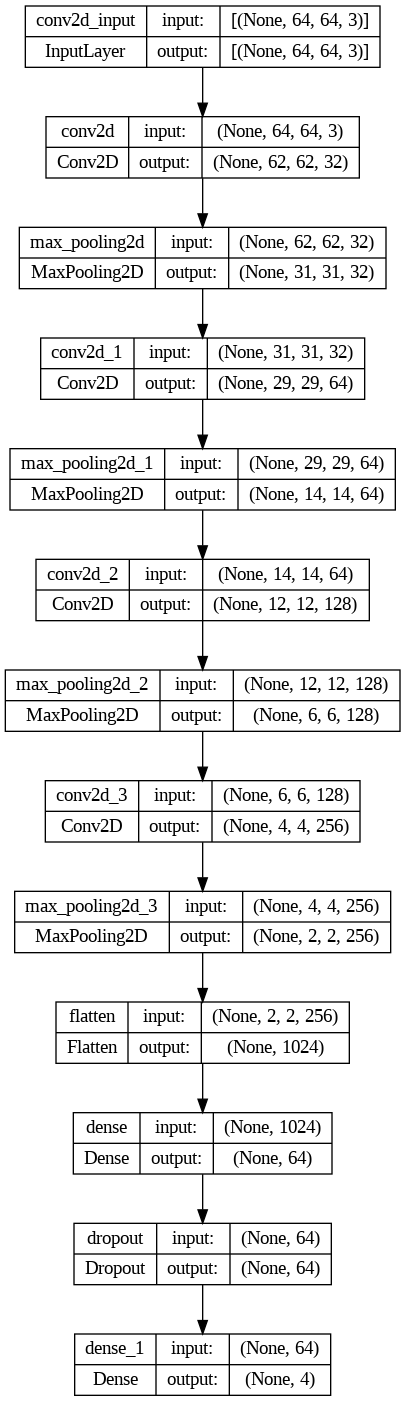

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)
